In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_files/data.csv')
# Correlation Matrix

In [129]:
display(df.describe())
display(df.info())

,SPY Volume,SPY Price Change,XLV Volume,XLV Price Change,IYK Volume,IYK Price Change,DFF
count,5.711000e+03,5711.000000,5.711000e+03,5711.000000,5.711000e+03,5711.000000,5711.000000
mean,1.139286e+08,0.014688,6.385056e+06,0.004211,1.540492e+05,0.005939,1.540410
std,9.149666e+07,0.962835,5.627530e+06,0.957831,3.085890e+05,0.835515,1.704008
min,3.303100e+06,-8.990575,9.000000e+02,-9.024483,6.000000e+02,-7.761196,0.040000
25%,5.588955e+07,-0.407194,1.470950e+06,-0.471541,4.260000e+04,-0.385345,0.130000
50%,8.559380e+07,0.058120,5.919100e+06,0.025509,8.070000e+04,0.026631,1.000000
75%,1.437550e+08,0.466976,9.048550e+06,0.501882,1.593000e+05,0.421202,2.330000
max,8.710263e+08,8.434666,6.647020e+07,8.000000,8.697300e+06,13.134444,5.410000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5711 non-null   object 
 1   SPY Volume        5711 non-null   int64  
 2   SPY Price Change  5711 non-null   float64
 3   XLV Volume        5711 non-null   int64  
 4   XLV Price Change  5711 non-null   float64
 5   IYK Volume        5711 non-null   int64  
 6   IYK Price Change  5711 non-null   float64
 7   DFF               5711 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 357.1+ KB


None

In [130]:
# Split Date
df[['Year','Month','Day']] = df["Date"].str.split('-', expand=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5711 non-null   object 
 1   SPY Volume        5711 non-null   int64  
 2   SPY Price Change  5711 non-null   float64
 3   XLV Volume        5711 non-null   int64  
 4   XLV Price Change  5711 non-null   float64
 5   IYK Volume        5711 non-null   int64  
 6   IYK Price Change  5711 non-null   float64
 7   DFF               5711 non-null   float64
 8   Year              5711 non-null   object 
 9   Month             5711 non-null   object 
 10  Day               5711 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 490.9+ KB


In [131]:
# Convert Day, Month, Year into integers

df = df.astype({"Day":"int32", "Month":"int32", "Year":"int32"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5711 non-null   object 
 1   SPY Volume        5711 non-null   int64  
 2   SPY Price Change  5711 non-null   float64
 3   XLV Volume        5711 non-null   int64  
 4   XLV Price Change  5711 non-null   float64
 5   IYK Volume        5711 non-null   int64  
 6   IYK Price Change  5711 non-null   float64
 7   DFF               5711 non-null   float64
 8   Year              5711 non-null   int32  
 9   Month             5711 non-null   int32  
 10  Day               5711 non-null   int32  
dtypes: float64(4), int32(3), int64(3), object(1)
memory usage: 424.0+ KB


In [132]:
df['Date'] = pd.to_datetime(df['Date'])
df['DOW'] = df['Date'].dt.day_name()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5711 non-null   datetime64[ns]
 1   SPY Volume        5711 non-null   int64         
 2   SPY Price Change  5711 non-null   float64       
 3   XLV Volume        5711 non-null   int64         
 4   XLV Price Change  5711 non-null   float64       
 5   IYK Volume        5711 non-null   int64         
 6   IYK Price Change  5711 non-null   float64       
 7   DFF               5711 non-null   float64       
 8   Year              5711 non-null   int32         
 9   Month             5711 non-null   int32         
 10  Day               5711 non-null   int32         
 11  DOW               5711 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(1)
memory usage: 468.6+ KB


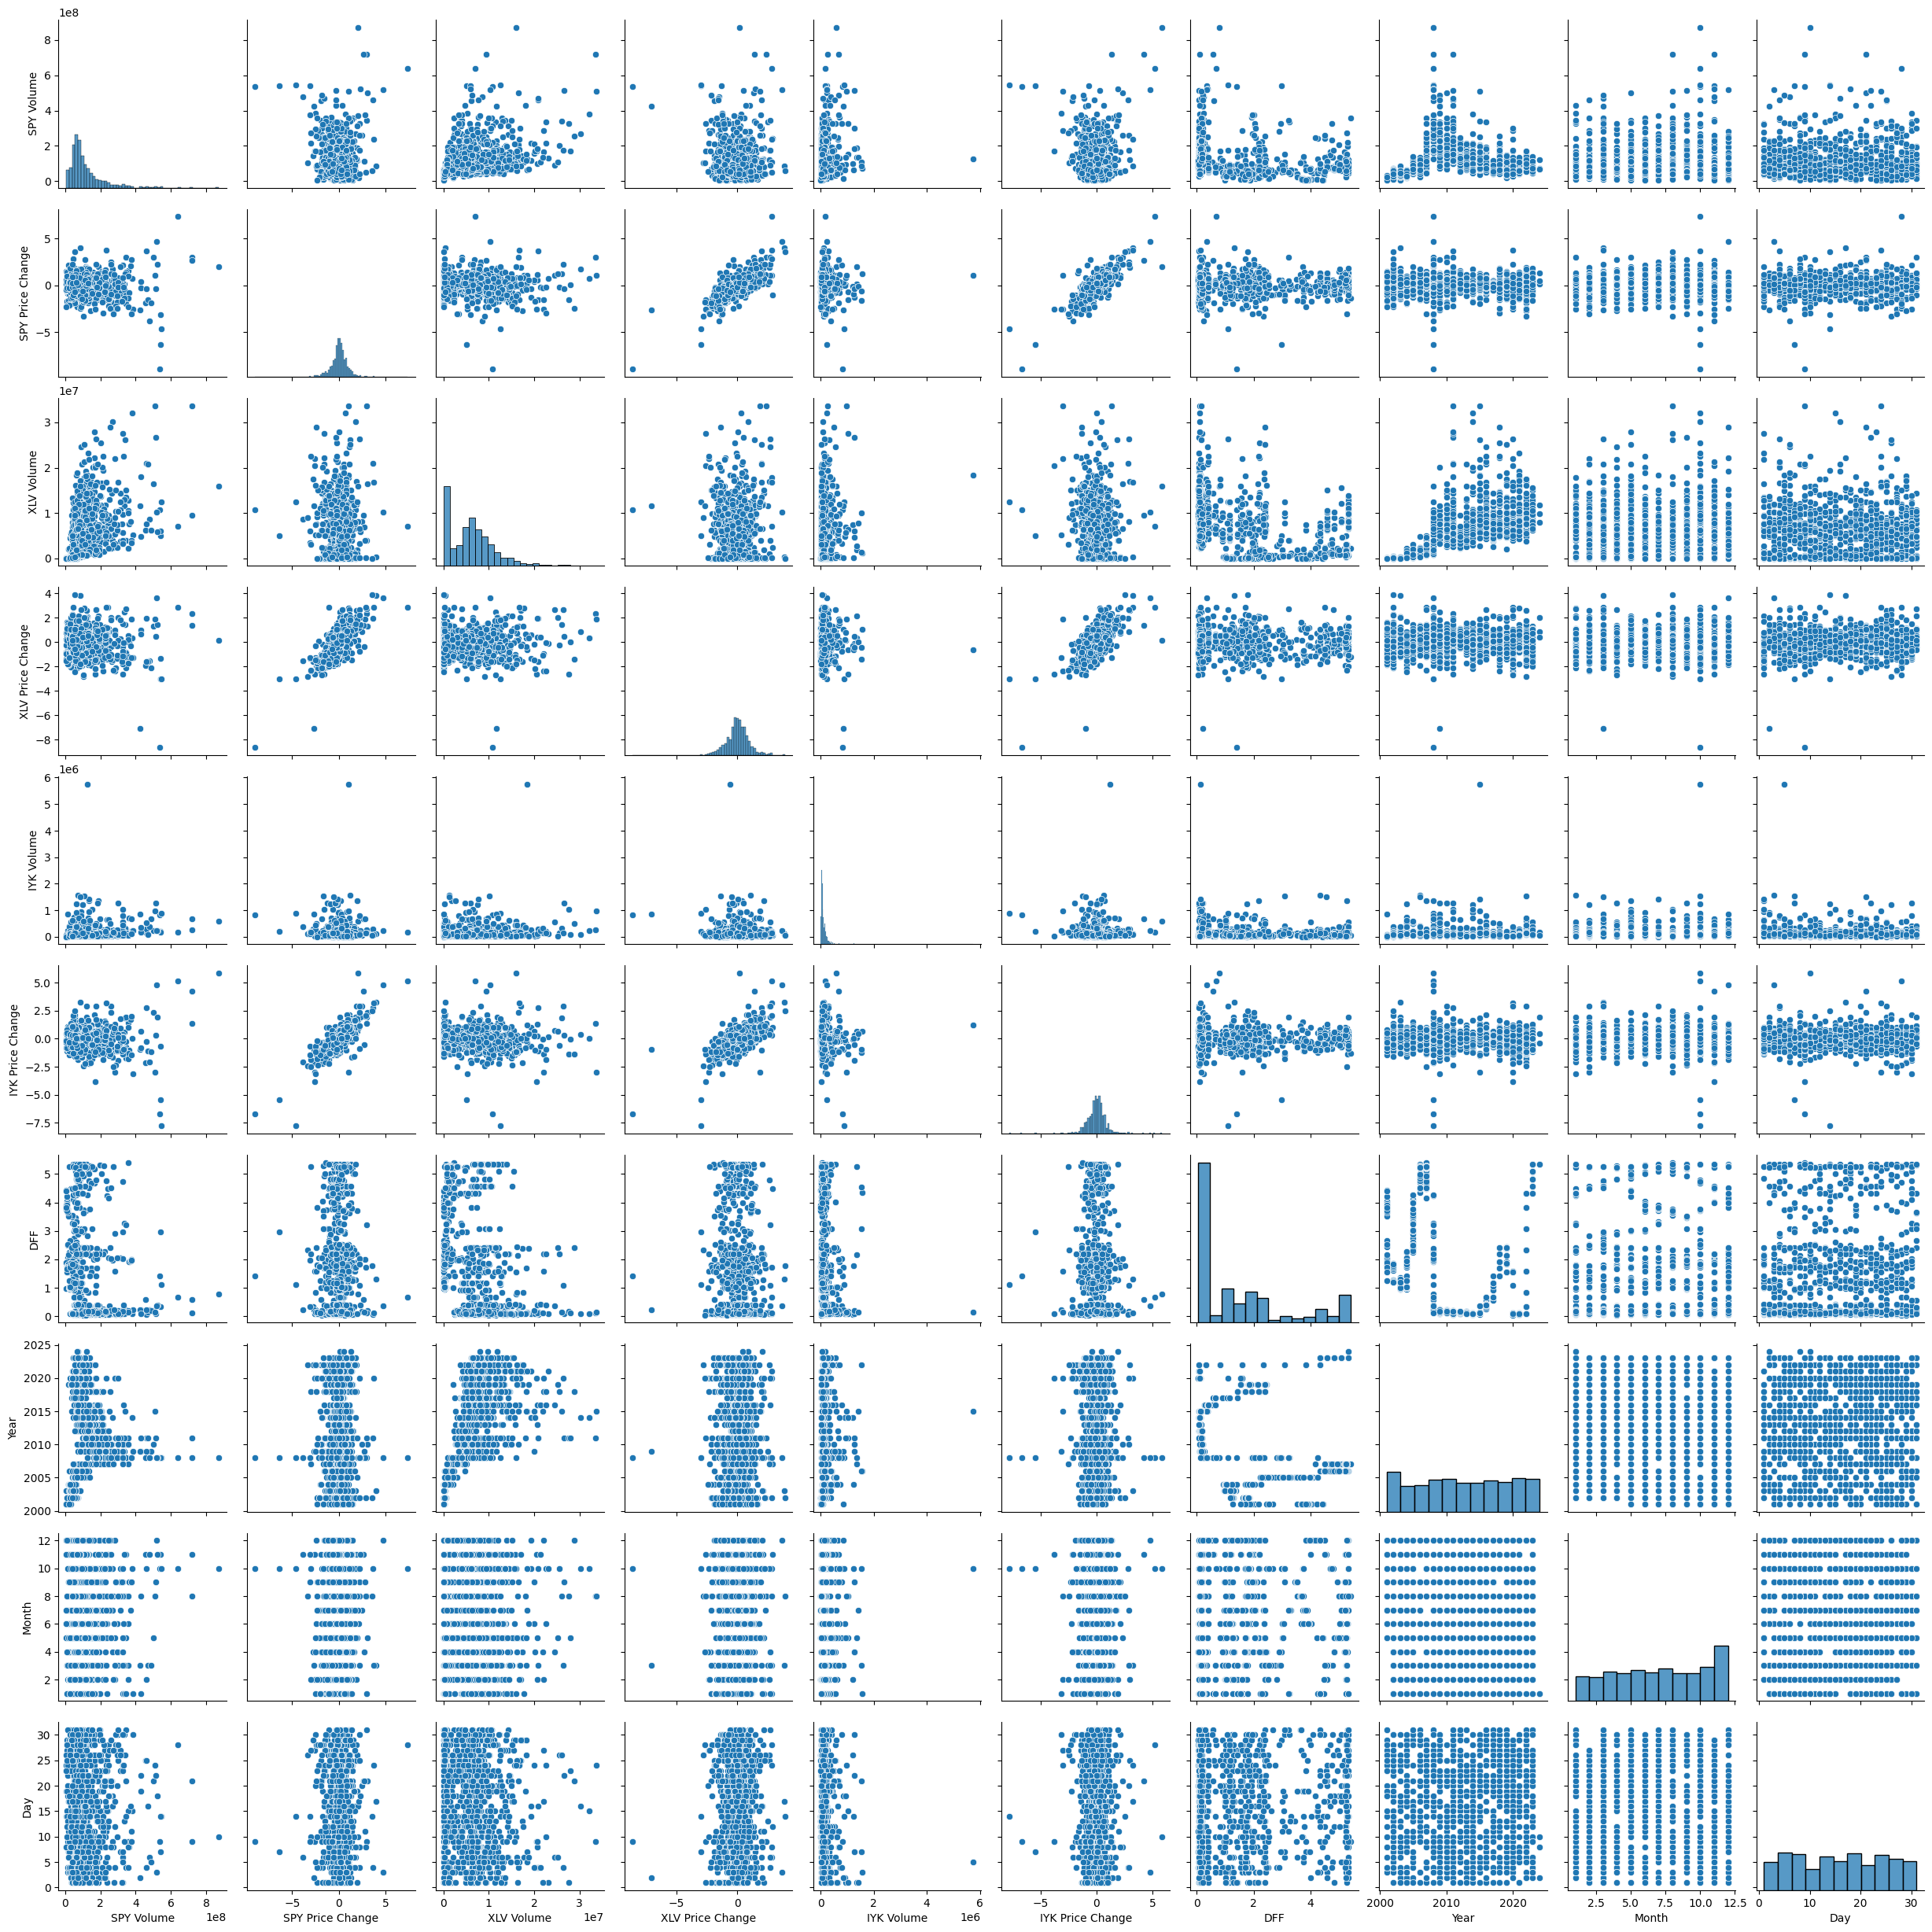

In [133]:
sns.pairplot(df.sample(1000))

In [134]:
df.drop(df.loc[df["DFF"] > df["DFF"].quantile(0.999)].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5708 entries, 0 to 5710
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5708 non-null   datetime64[ns]
 1   SPY Volume        5708 non-null   int64         
 2   SPY Price Change  5708 non-null   float64       
 3   XLV Volume        5708 non-null   int64         
 4   XLV Price Change  5708 non-null   float64       
 5   IYK Volume        5708 non-null   int64         
 6   IYK Price Change  5708 non-null   float64       
 7   DFF               5708 non-null   float64       
 8   Year              5708 non-null   int32         
 9   Month             5708 non-null   int32         
 10  Day               5708 non-null   int32         
 11  DOW               5708 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(3), int64(3), object(1)
memory usage: 512.8+ KB


<Axes: xlabel='Year', ylabel='SPY Price Change'>

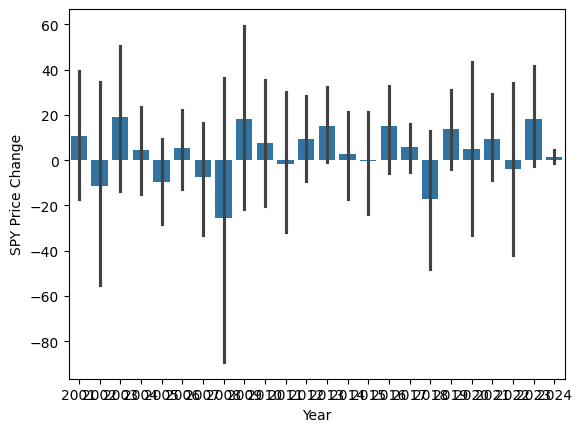

In [140]:
sns.barplot(x="Year", y="SPY Price Change", data= df, estimator=np.sum)

In [143]:
df.groupby("Year")["DFF"].median()

Year
2001    3.530
2002    1.730
2003    1.115
2004    1.240
2005    3.185
2006    5.125
2007    5.240
2008    2.010
2009    0.160
2010    0.190
2011    0.090
2012    0.150
2013    0.090
2014    0.090
2015    0.130
2016    0.395
2017    1.160
2018    1.910
2019    2.380
2020    0.090
2021    0.080
2022    1.580
2023    5.080
2024    5.330
Name: DFF, dtype: float64